<a href="https://colab.research.google.com/github/huggingface/deep-rl-class/blob/main/unit4/unit4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 4: Let's learn about Unity ML-Agents with Hugging Face 🤗



![cover](https://miro.medium.com/max/700/1*8DV9EFl-vdijvcTHilHuEw.png)

In this notebook, you'll learn about ML-Agents and use one of the pre-made environments: Pyramids. 

In this environment, we’ll train an agent that needs to press a button to spawn a pyramid, then navigate to the pyramid, knock it over, and move to the gold brick at the top.

❓ If you have questions, please post them on #study-group-unit1 discord channel 👉 https://discord.gg/aYka4Yhff9

🎮 Environments: 
- [Pyramids](https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Learning-Environment-Examples.md#pyramids)


⬇️ Here is an example of what **you will achieve at the end of this notebook.** ⬇️

![cover](https://miro.medium.com/max/1200/1*p_JGUtOTM7BAY0QfaoyLBg.gif)

## This notebook is from Deep Reinforcement Learning Class

This notebook was written by [Abid Ali Awan alias kingabzpro](https://github.com/kingabzpro) 🤗

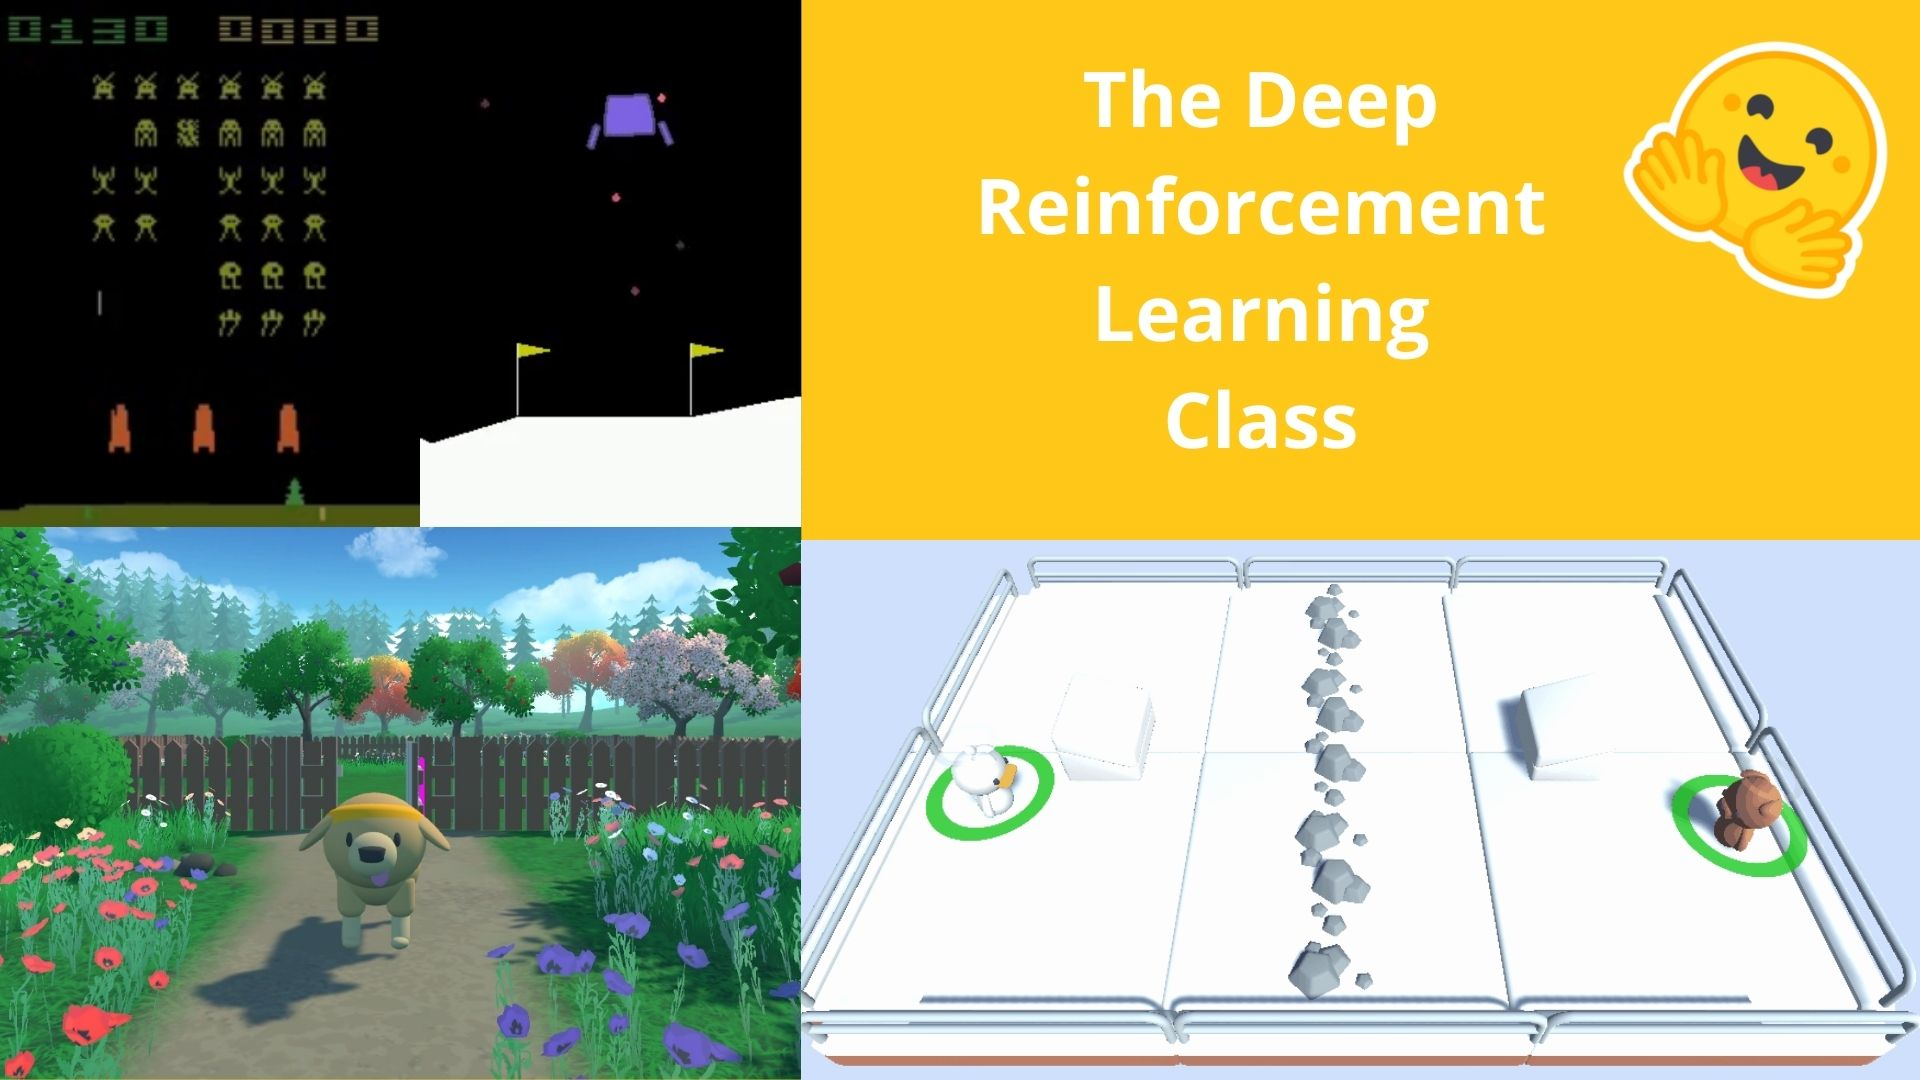

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, and RLlib.
- 🤖 Train **agents in unique environments** 

And more check 📚 the syllabus 👉 https://github.com/huggingface/deep-rl-class

The best way to keep in touch is to join our discord server to exchange with the community and with us 👉🏻 https://discord.gg/aYka4Yhff9

## Prerequisites 🏗️
To dive in this notebook, **you need to read in parallel the tutorial** 👉 https://link.medium.com/KOpvPdyz4qb


### Step 1: Clone the repository and install the dependencies 🔽
- We need to clone the repository, that **contains the experimental version of the library that allows you to push your trained agent to the Hub.**

In [ ]:
%%capture
# Clone the repository (can take 1min)
!git clone https://github.com/huggingface/ml-agents/

In [ ]:
%%capture
# Go inside the repository and install the package
%cd ml-agents
!pip3 install -e ./ml-agents-envs
!pip3 install -e ./ml-agents

### Step 2: Download and move the environment zip file in `./trained-envs-executables/linux/`
- Our environment executable is in a zip file.
- We need to download it and place it to `./trained-envs-executables/linux/`

In [ ]:
!mkdir ./trained-envs-executables
!mkdir ./trained-envs-executables/linux

Download the file Pyramids.zip from https://drive.google.com/uc?export=download&id=1UiFNdKlsH0NTu32xV-giYUEVKV4-vc7H using `wget`. Check out the full solution to download large files from GDrive [here](https://bcrf.biochem.wisc.edu/2021/02/05/download-google-drive-files-using-wget/)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UiFNdKlsH0NTu32xV-giYUEVKV4-vc7H' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1UiFNdKlsH0NTu32xV-giYUEVKV4-vc7H" -O ./trained-envs-executables/linux/Pyramids.zip && rm -rf /tmp/cookies.txt

**OR** Download directly to local machine and then drag and drop the file from local machine to `./trained-envs-executables/linux`

Wait for the upload to finish and then run the command below. 

image.png

In [ ]:
%%capture
!unzip -d ./trained-envs-executables/linux/ ./trained-envs-executables/linux/Pyramids.zip

Make sure your file is accessible 

In [ ]:
!chmod -R 755 ./trained-envs-executables/linux/Pyramids/Pyramids

### Step 3: Modify the PyramidsRND config file
- In ML-Agents, you define the **training hyperparameters into config.yaml files.**
For this first training, we’ll modify one thing:
- The total training steps hyperparameter is too high since we can hit the benchmark in only 1M training steps.
👉 To do that, we go to config/ppo/PyramidsRND.yaml,**and modify these to max_steps to 1000000.**

- Click here to open the config.yaml: /content/ml-agents/config/ppo/PyramidsRND.yaml

- Modify the `max_steps` to 500,000

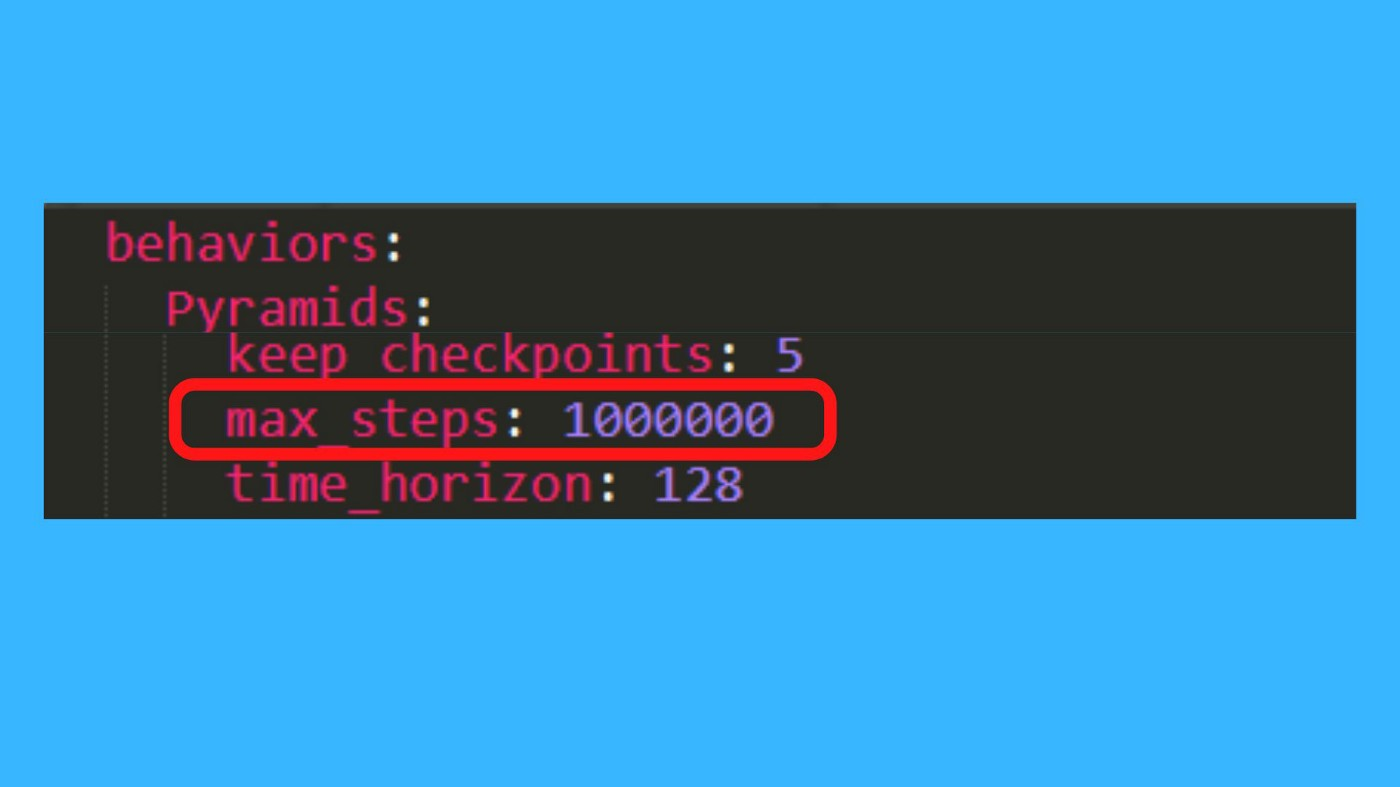

As an experimentation, you should also try to modify some other hyperparameters, Unity provides a very [good documentation explaining each of them here](https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Training-Configuration-File.md).

We’re now ready to train our agent 🔥.

### Step 4: Train our agent

To train our agent, we just need to **launch mlagents-learn and select the executable containing the environment.**

We define four parameters:

1. `mlagents-learn <config>`: the path where the hyperparameter config file is.
2. `--env`: where the environment executable is.
3. `--run_id`: the name you want to give to your training run id.
4. `--no-graphics`: to not launch the visualization during the training.

Train the model and use the `--resume` flag to continue training in case of interruption. 

> It will fail first time when you use `--resume`, try running the block again to bypass the error. 



The training will take 30 to 45min depending on your machine, go take a ☕️you deserve it 🤗.

In [ ]:
!mlagents-learn ./config/ppo/PyramidsRND.yaml --env=./trained-envs-executables/linux/Pyramids/Pyramids --run-id="Pyramids Training" --no-graphics

### Step 5: Push the agent to the 🤗 Hub
- Now that we trained our agent, we’re **ready to push it to the Hub and see him playing online 🔥.**

To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account to HF ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

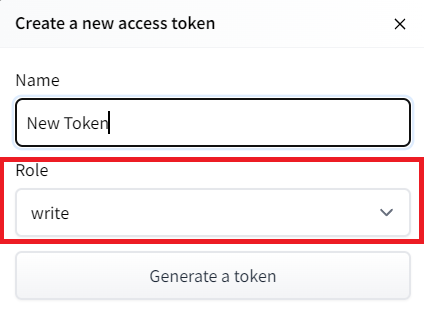

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

Then, we simply need to run `mlagents-push-to-hf`.



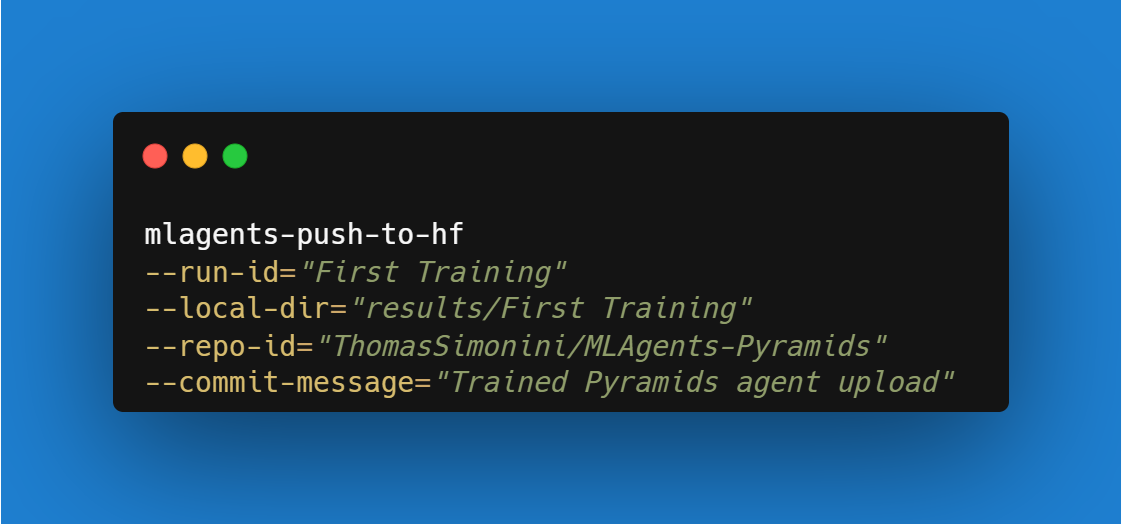

And we define 4 parameters:

1. `--run-id`: the name of the training run id.
2. `--local-dir`: where the agent was saved, it’s results/<run_id name>, so in my case results/First Training.
3. `--repo-id`: the name of the Hugging Face repo you want to create or update. It’s always <your huggingface username>/<the repo name>
If the repo does not exist **it will be created automatically**
4. `--commit-message`: since HF repos are git repository you need to define a commit message.

In [ ]:
!mlagents-push-to-hf --run-id="Pyramids Training" --local-dir="./results/Pyramids Training" --repo-id="ThomasSimonini/testpyramidsrnd" --commit-message="First Pyramids"

Else, if everything worked you should have this at the end of the process(but with a different url 😆) :



```
Your model is pushed to the hub. You can view your model here: https://huggingface.co/ThomasSimonini/MLAgents-Pyramids
```

It’s the link to your model, it contains a model card that explains how to use it, your Tensorboard and your config file. **What’s awesome is that it’s a git repository, that means you can have different commits, update your repository with a new push etc.**

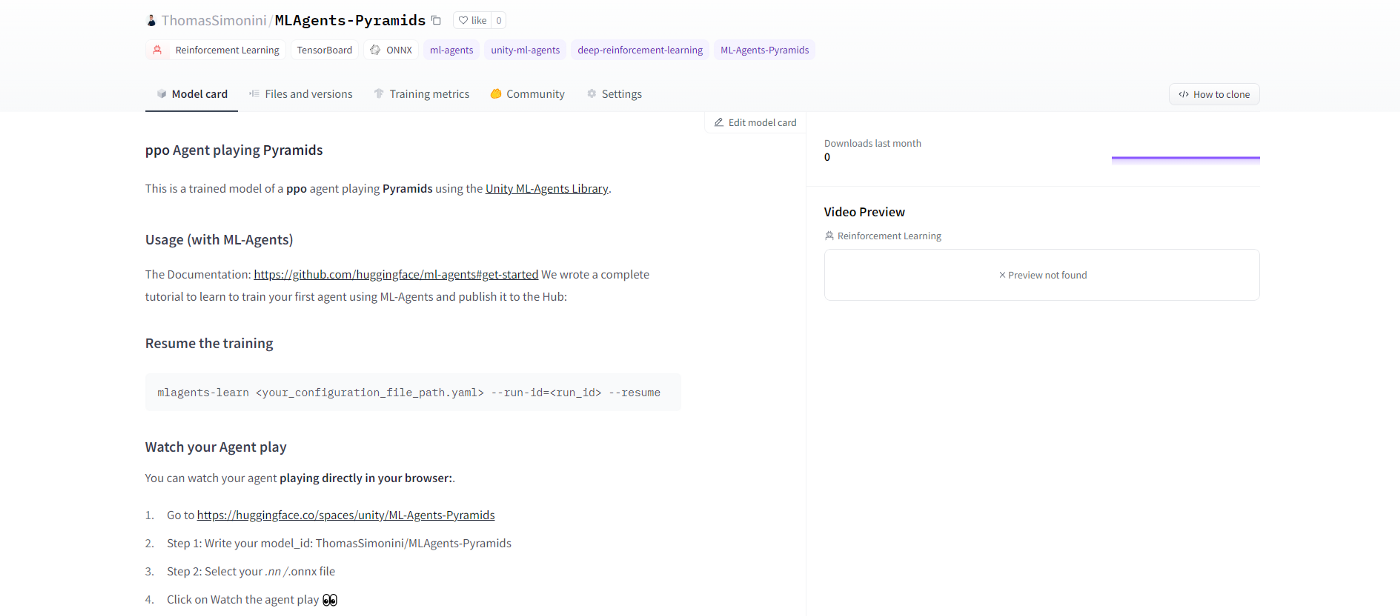

But now comes the best: **being able to visualize your agent online 👀.**

### Step 6: Watch our agent play 👀

For this step it’s simple:

Go to your repository
In Watch Your Agent Play section click on the link: https://huggingface.co/spaces/unity/ML-Agents-Pyramids

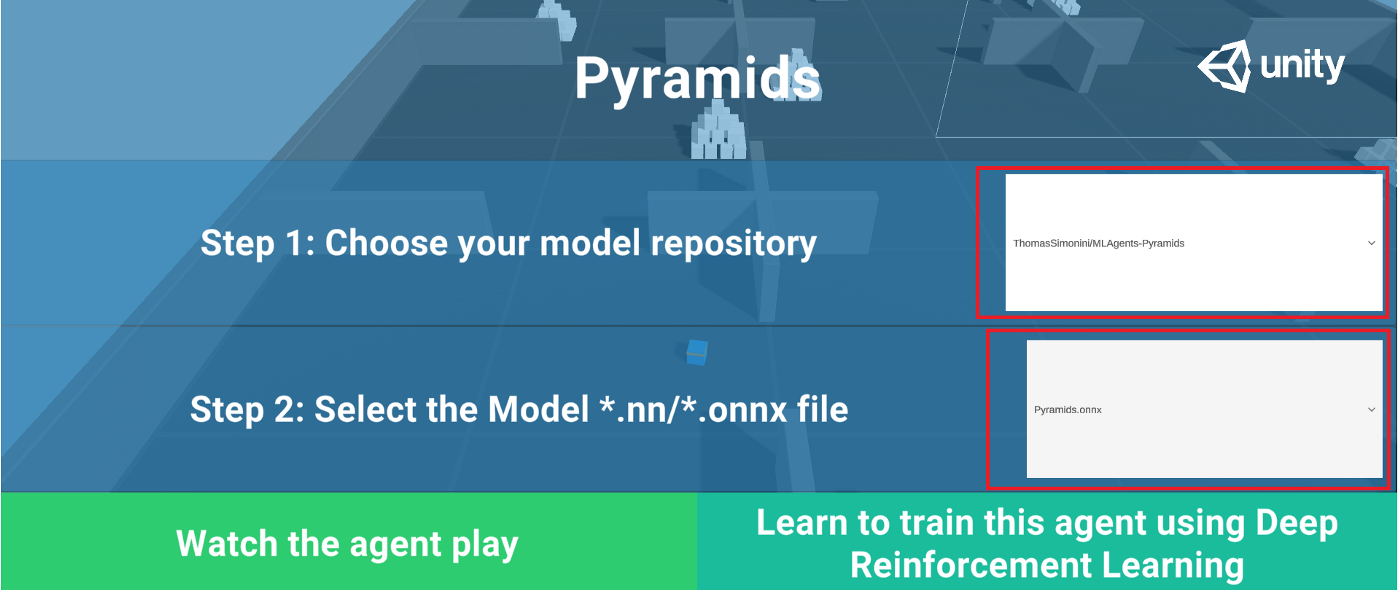

1. In step 1, choose your model repository which is the model id (in my case ThomasSimonini/MLAgents-Pyramids).

2. In step 2, **choose what model you want to replay**:
  - I have multiple one, since we saved a model every 500000 timesteps. 
  - But if I want the more recent I choose Pyramids.onnx

👉 What’s nice **is to try with different models step to see the improvement of the agent.**

### 🎁 Bonus: Why not train on another environment?
Now that you know how to train an agent using MLAgents, **why not try another environment?** 

MLAgents provides 18 different and we’re building some custom ones. The best way to learn is to try things of your own, have fun.



![cover](https://miro.medium.com/max/1400/0*xERdThTRRM2k_U9f.png)

You have the full list of the one currently available on Hugging Face here 👉 https://github.com/huggingface/ml-agents#the-environments

That’s all for today. Congrats on finishing this tutorial! You’ve just trained your first ML-Agent and shared it to the Hub 🥳.

The best way to learn is to practice and try stuff. Why not try another environment? ML-Agents has 18 different environments, but you can also create your own? Check the documentation and have fun!

## Keep Learning, Stay  awesome 🤗